In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Titanic dataset and view the first 5 rows of the dataset
data = pd.read_csv('tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Performing basic EDA

In [4]:
#Checking the dimension of the dataset:
print("The total rows in this dataset is:" ,data.shape[0] ,"\nThe total columns in this dataset is:" ,data.shape[1])

The total rows in this dataset is: 418 
The total columns in this dataset is: 12


In [5]:
# Checking the type of data and the missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


 - Age of datatype float and Cabin of datatype Object have missing values.

## Data Cleaning

In [6]:
# Check for missing values
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Handling missing values

 - As the dtype of 'Age' and 'Fare' are Float so median is used for imputing the missing value
 - As the dtype of 'Cabin' is Object so mode is used for imputing the missing value

In [7]:
# Handle missing values 
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Cabin'].fillna(data['Cabin'].mode(), inplace=True)

In [8]:
# Check if there are still any missing values in the dataset
if data.isnull().any().any():
    print("There are missing values in the dataset.")
    print(data.isnull().sum())
else:
    print("There are no missing values in the dataset.")


There are missing values in the dataset.
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64


In [9]:
 #Removing the unnecessary columns 'Cabin' might not be relevant for analysis
data.drop(['Cabin'], axis=1, inplace=True)


In [10]:
# Exploratory Data Analysis (EDA)
# Summary statistics
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   29.599282    0.447368   
std     120.810458    0.481622    0.841838   12.703770    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.576535  
std      0.981429   55.850103  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.471875  
max      9.000000  512.329200  


## Performing Correlation to understand the important numerical features in the dataset:

In [11]:
#Selecting the numerical columns:
print("The Numerical columns are: ")
data_numerical=data.select_dtypes(np.number)
data_numerical

The Numerical columns are: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,0,3,27.0,0,0,8.0500
414,1306,1,1,39.0,0,0,108.9000
415,1307,0,3,38.5,0,0,7.2500
416,1308,0,3,27.0,0,0,8.0500


In [12]:
#  Correlation matrix (for continuous variables)
correlation_matrix = data_numerical.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.031447,0.003818,0.043080,0.008633
Survived,-0.023245,1.000000,-0.108615,0.008035,0.099943,0.159120,0.192036
Pclass,-0.026751,-0.108615,1.000000,-0.467853,0.001087,0.018721,-0.577313
Age,-0.031447,0.008035,-0.467853,1.000000,-0.071197,-0.043731,0.342357
SibSp,0.003818,0.099943,0.001087,-0.071197,1.000000,0.306895,0.171912
Parch,0.043080,0.159120,0.018721,-0.043731,0.306895,1.000000,0.230325
Fare,0.008633,0.192036,-0.577313,0.342357,0.171912,0.230325,1.000000


### Visualization

 - Heatmap
 - Pair Plots
 - Box Plots
 - Bar Plots
 - Histograms

## 1.Heatmap

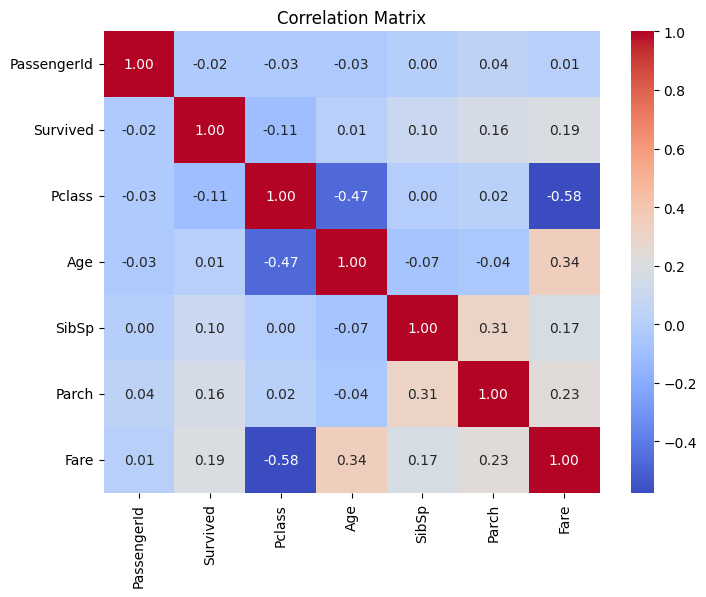

In [13]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Interpretation

## 2. Pair Plots (Scatter Matrix)

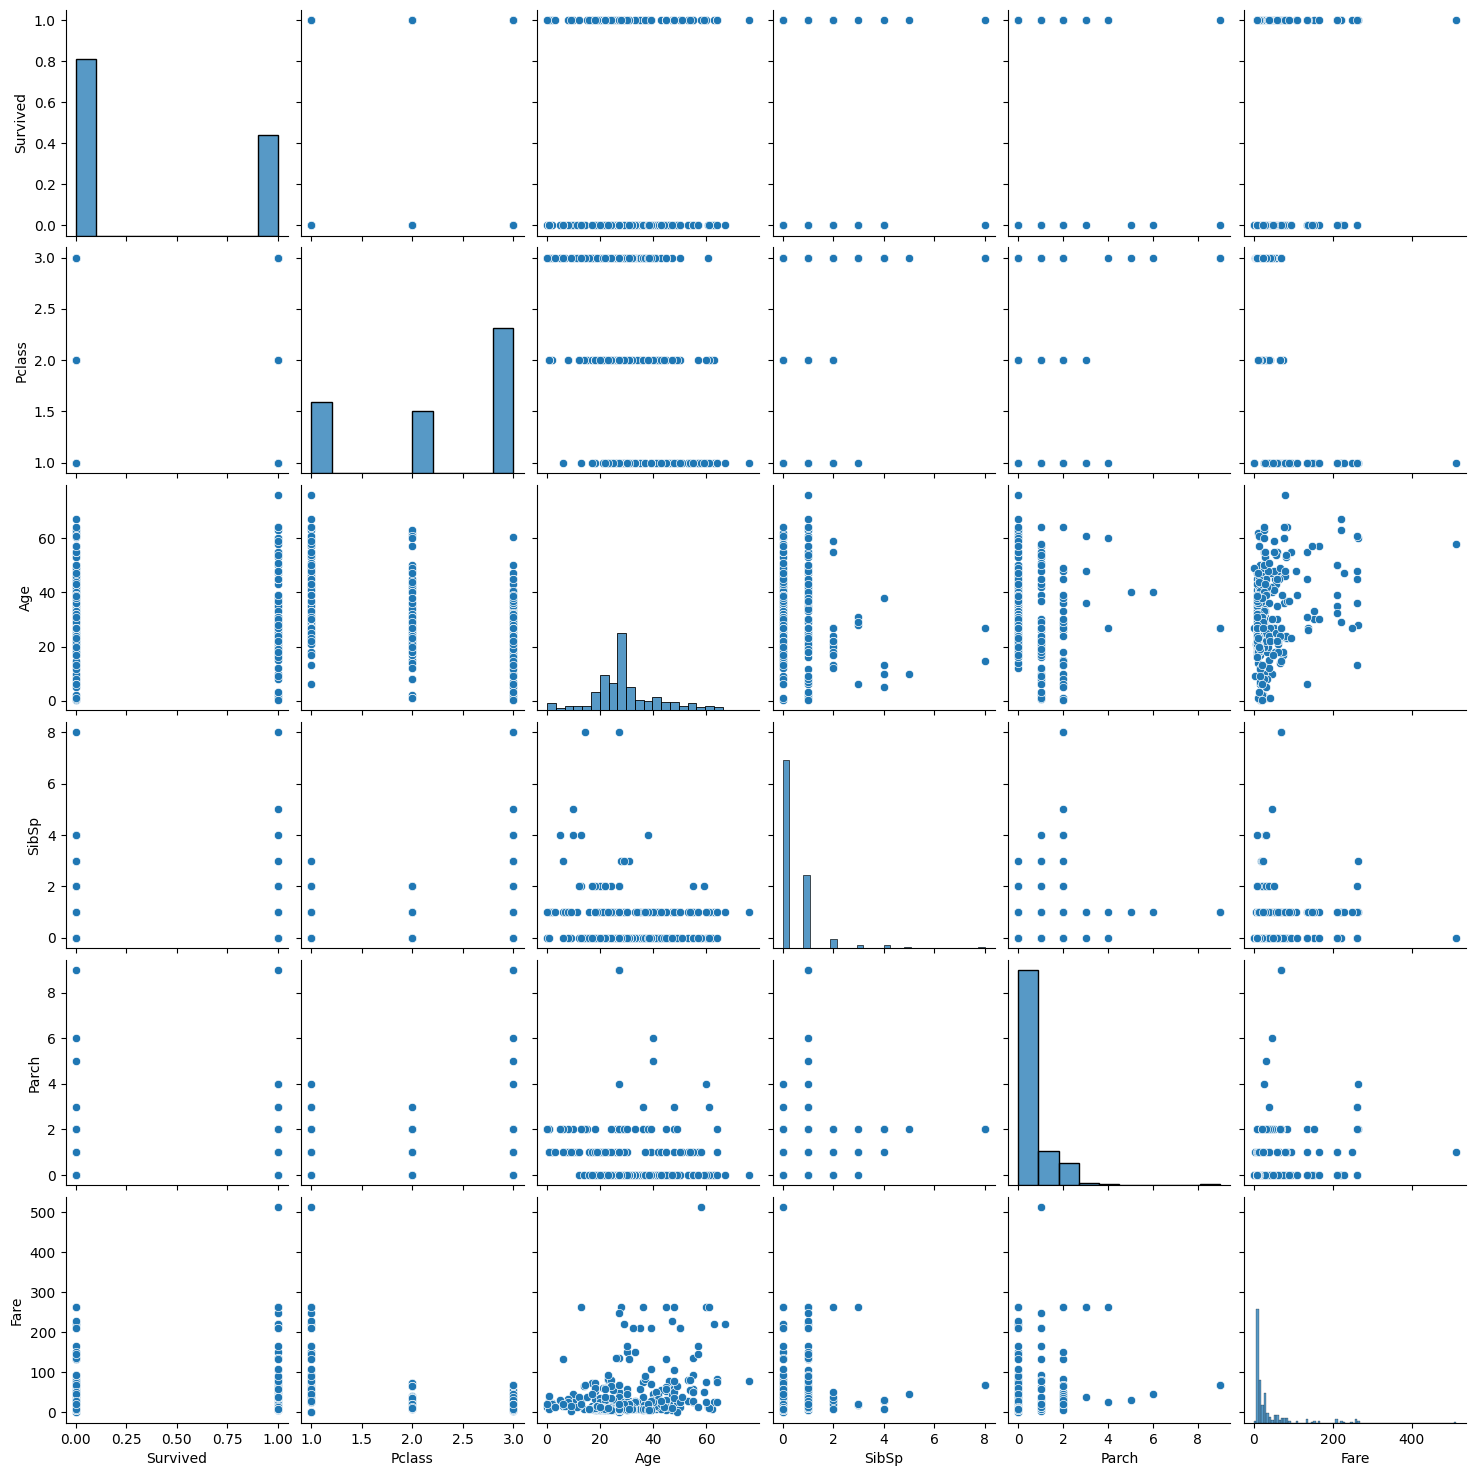

In [14]:
# Pairplot (for continuous variables)

sns.pairplot(data=data, vars=["Survived", "Pclass"	,"Age",	"SibSp",	"Parch",	"Fare"])

### Interpretation

 - From the Diagonal Plot(Kernal Density Estimator): It represents the distribution of each variable independently.We can see the variable 'Age' is normally distributed and the variables 'Fare' , 'Parch' and 'SibSp' are right skewed.
 - Scatter Plots: The off-diagonal plots are scatter plots, and they show the relationship between pairs of variables. Here we see there is no such clear relationship between most of the variables.

## 3.Box Plots

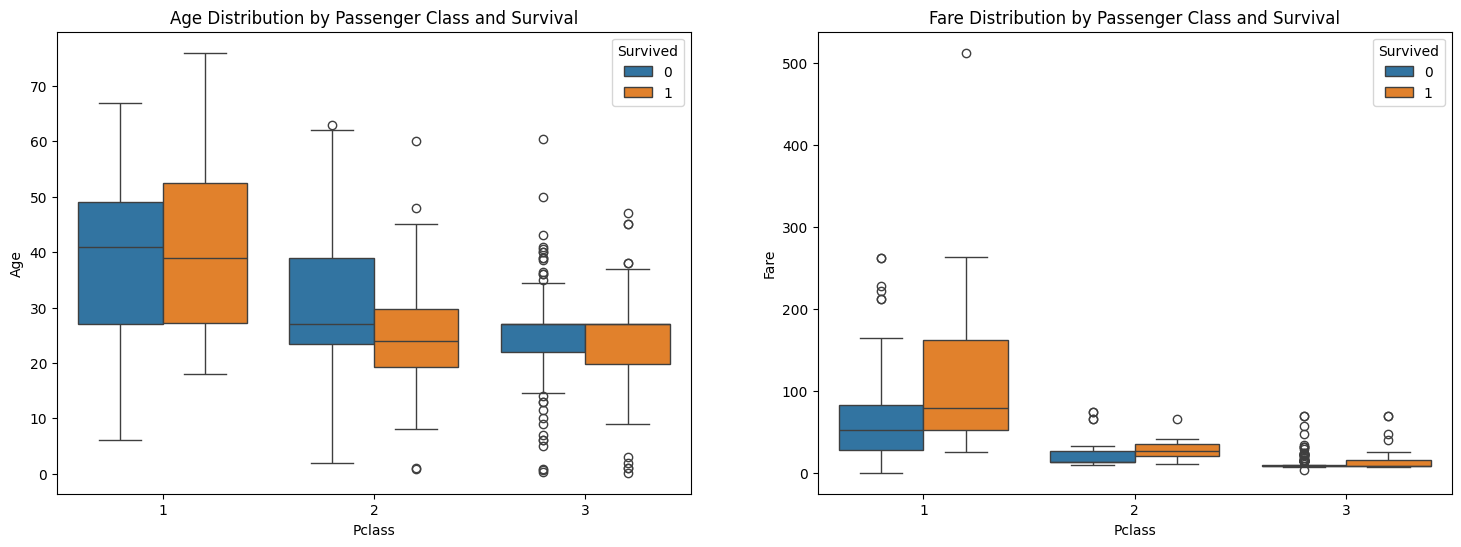

In [15]:
# Create subplots for 'Age' and 'Fare' by 'Pclass'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Box plot for 'Age' by 'Pclass'
sns.boxplot(x='Pclass', y='Age', data=data, hue='Survived', ax=axes[0])
axes[0].set_title('Age Distribution by Passenger Class and Survival')

# Box plot for 'Fare' by 'Pclass'
sns.boxplot(x='Pclass', y='Fare', data=data, hue='Survived', ax=axes[1])
axes[1].set_title('Fare Distribution by Passenger Class and Survival')

plt.show()


### Interpretation

#### 1. Age Distribution by Passenger Class and Survival:

##### Key observations:

 - Passengers in the first class ('Pclass' 1) generally tend to be older than those in the second ('Pclass' 2) and third ('Pclass' 3) classes.
 - Within each passenger class, the box plots are divided by color (survived or not). This division helps to see if there is a significant difference in age distribution between survivors and non-survivors.

#### 2. Fare Distribution by Passenger Class and Survival:

##### Key observations:

 - Passengers in the first class ('Pclass' 1) generally paid higher fares than those in the second and third classes.
 - Within each passenger class, the box plots are divided by color, allowing you to see differences in fare distribution between survivors and non-survivors.
 - There is some variation in fare distribution, especially in the first and second classes, with some passengers in these classes paying significantly more.

## 4. Bar Plots

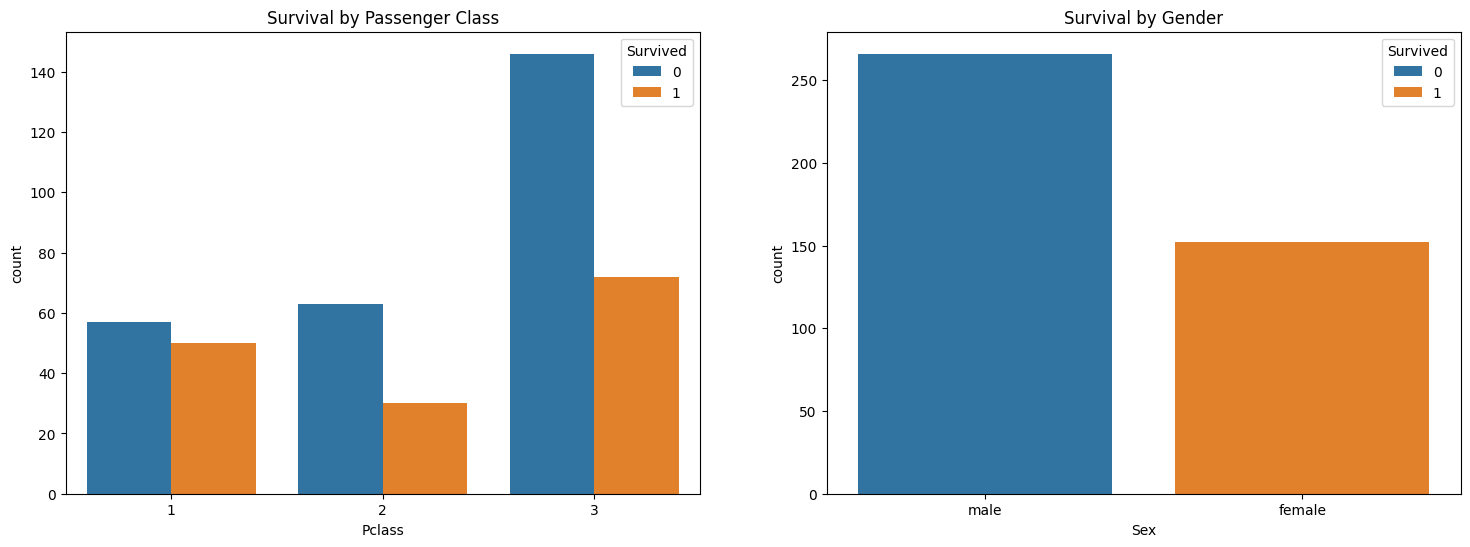

In [16]:
# Create subplots for 'Pclass' and 'Sex' by 'Survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Bar plot for 'Pclass' by 'Survived'
sns.countplot(x='Pclass', data=data, hue='Survived', ax=axes[0])
axes[0].set_title('Survival by Passenger Class')

# Bar plot for 'Sex' by 'Survived'
sns.countplot(x='Sex', data=data, hue='Survived', ax=axes[1])
axes[1].set_title('Survival by Gender')

plt.show()


#### Interpretation

 - First-class passengers had a higher chance of survival compared to second and third-class passengers.
 - Female passengers had a substantially higher survival rate than male passengers, reflecting the famous "women and children first" policy during the Titanic's evacuation.

## 5. Histograms

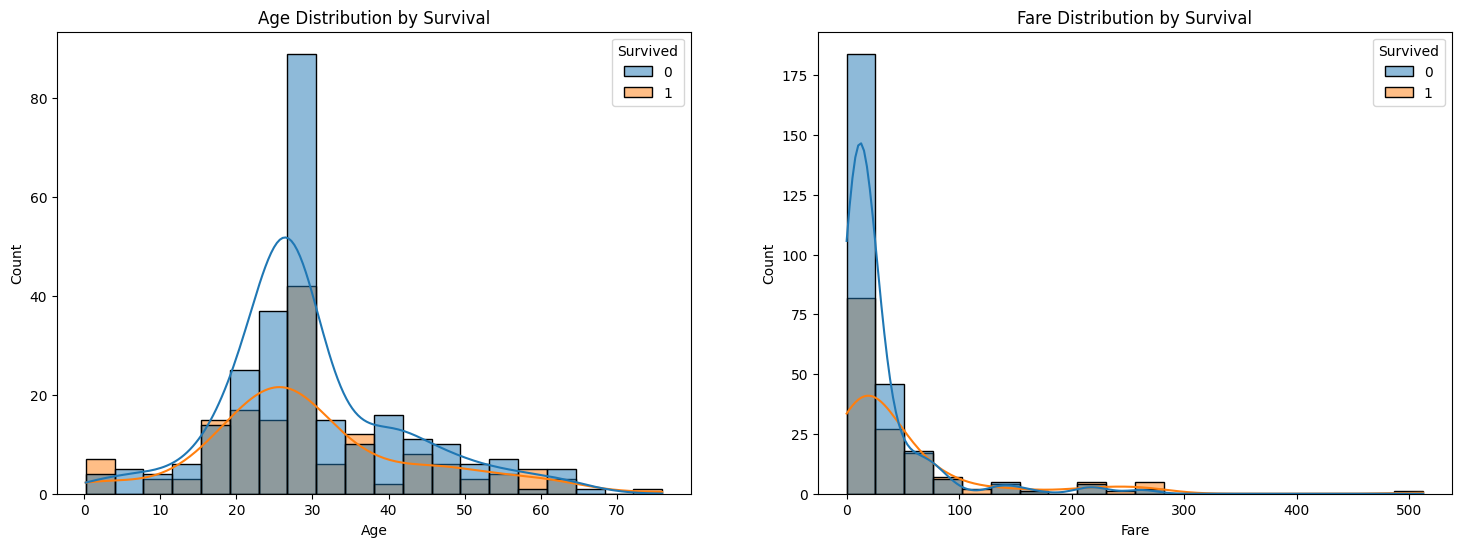

In [17]:
# Create subplots for 'Age' and 'Fare' by 'Survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram for 'Age' by 'Survived'
sns.histplot(data=data, x='Age', hue='Survived', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution by Survival')

# Histogram for 'Fare' by 'Survived'
sns.histplot(data=data, x='Fare', hue='Survived', bins=20, kde=True, ax=axes[1])
axes[1].set_title('Fare Distribution by Survival')

plt.show()

#### Interpretation

 - The age distribution suggests that children and older passengers had a higher chance of survival.
 - The fare distribution indicates that passengers who paid higher fares had a better chance of survival.